In [9]:
# --- Cell 1: Notebook Metadata ---
# Title: Phase Portraits
# Author: Eigenscribe
# Date: 2025-08-15
# Version: v1.0
# Description: Template for conceptual notes, quick demos, and plotting tests.

# ðŸŒ€ Phase Portraits
**Purpose:** Phase Plane Analysis

**Notes:** 

## References and Acknowledgements
| # | Source | Notes |
|---|--------|-------|
| 1 | Musacchio, F. (2024, Marchâ€¯17). *Phaseâ€‘plane analysis* (blog post). Retrieved 2025â€‘08â€‘25 from [https://www.fabriziomusacchio.com/blog/2024-03-17-phase_plane_analysis/](https://www.fabriziomusacchio.com/blog/2024-03-17-phase_plane_analysis/) | Provided the conceptual and coding foundation for the content in this notebook.  |  

In [10]:
# --- Cell 2: Import and Setup ---
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from numpy import real
from numpy.typing import NDArray
from typing import Tuple

# Type Aliases
Matrix2x2 = NDArray[np.float64]
EigenPair = Tuple[NDArray[np.complex128], NDArray[np.complex128]]

# Reset + set global defaults (run once)
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams['figure.figsize'] = (8, 5)   # inches
plt.rcParams['axes.grid'] = True

# Set random seed for reproducibility 
np.random.seed(27)

print("Environment ready!")

Environment ready!


## 1. Conceptual Notes
Use this section for derivatives, key equations, or conceptual equations

In [11]:
# --- Cell 3: Example Calculation ---
# Quck math example
k_B = 1.38e-23     # Boltzmann constant (J/K)
T = 300            # Temperature (K)
energy = k_B * T
print(f"Thermal energy: {energy: .2e} J")

Thermal energy:  4.14e-21 J


## 2. Demo Plots
Use this section for plot prototypes and experiments.

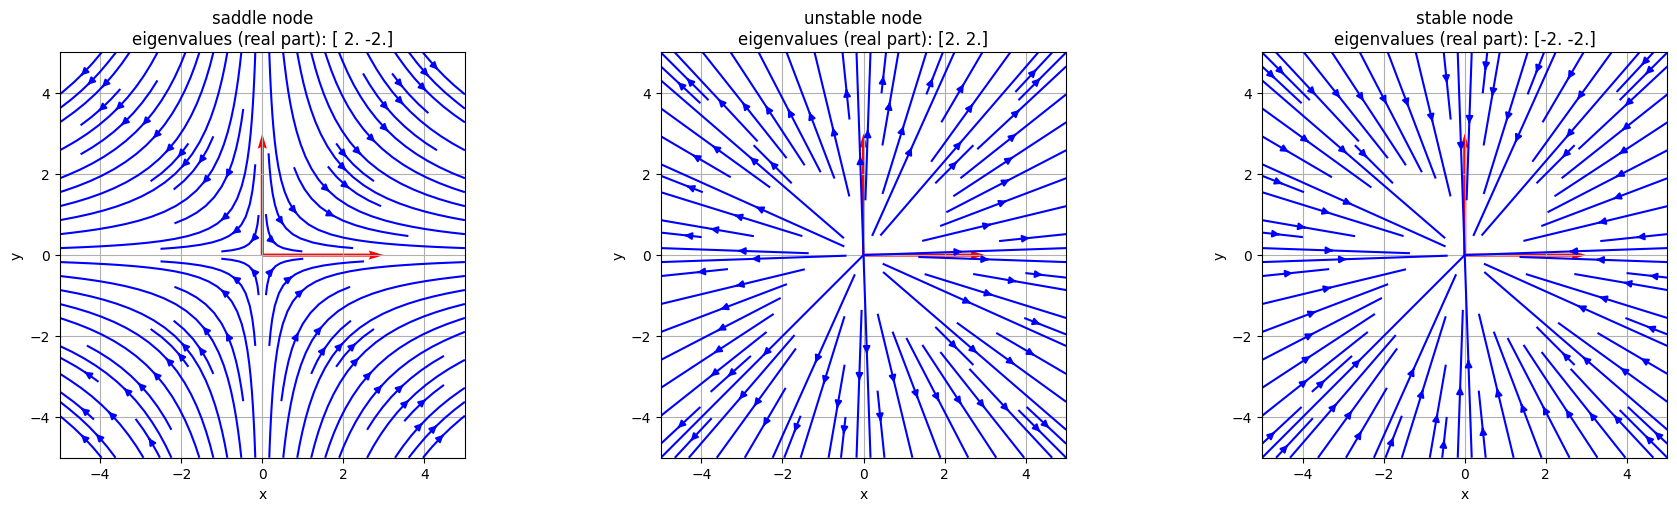

In [16]:
# --- Cell 4: Phase Planes for three 2D Linear Systems---
# Define the systems
A_saddle = np.array([[2, 0], [0, -2]], dtype=float)          # saddle node
A_unstable = np.array([[2, 0], [0, 2]], dtype=float)         # unstable node
A_stable = np.array([[-2, 0], [0, -2]], dtype=float)         # stable node

# Calculate eigenvalues and eigenvectors
evals_saddle, evecs_saddle = eig(A_saddle)
evals_unstable, evecs_unstable = eig(A_unstable)
evals_stable, evecs_stable = eig(A_stable)

# Plot the phase portraits for each system
def plot_phase_portrait(
        A: Matrix2x2, 
        evecs: NDArray[np.complex128], 
        evals: NDArray[np.complex128], 
        title: str,
        ax: plt.Axes,
) -> None:

    # Grid on which we evaluate the vector field
    x, y = np.meshgrid(
        np.linspace(-5, 5, 20), 
        np.linspace(-5, 5, 20)
    )

    # Horizontal and vertical components of the field
    u: Matrix2x2 = A[0, 0] * x + A[0, 1] * y    # dx/dt
    v: Matrix2x2 = A[1, 0] * x + A[1, 1] * y    # dy/dt

    # Plot streamlines
    ax.streamplot(x, y, u, v, color="b")

    # Plot eigenvectors as red arrows (scaled for visibility)
    for vec in evecs.T:
        ax.quiver(
            0, 0,
            3 * np.real(vec[0]),
            3 * np.real(vec[1]),
            scale=1,
            scale_units="xy",
            angles="xy",
            color="r"
        )

    ax.set_title(
        f"{title}\n"
        f"eigenvalues (real part): {np.real(evals)}"
    )
    ax.set_aspect("equal")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Plot saddle node:
plot_phase_portrait(A_saddle, evecs_saddle, evals_saddle, 'saddle node', axes[0])

# Plot unstable node:
plot_phase_portrait(A_unstable, evecs_unstable, evals_unstable, 'unstable node', axes[1])

# Plot stable node:
plot_phase_portrait(A_stable, evecs_stable, evals_stable, 'stable node', axes[2])

plt.show()

## 3. Coding Notes
- Notes or snippets or libraries
- TODO lists or reminders

## 4. Experiments / Sandbox
Use this section for quick try-outs or debugging.

In [13]:
# --- Cell 5: Sandbox ---
data = np.random.randn(100)
print("Mean:", np.mean(data))

Mean: 0.09965728754220285


## 5. Summary / Next Steps
- Summary of what was tested
- Notes on what to try next